In [1]:
#40089940
#Axel Dzeukou

#comp 333 lab assignment 2. The objective is to perform descriptive data analytics on input data frames

#the source of the input is a modified version of the tips.csv file provided in class. its location is https://drive.google.com/file/d/1bRvRn856XvYsVbGFlTxBthcBYFzCek3g/view?usp=sharing
#after transforming the modified tips.csv file into the dataframe 'tips_df' i select the columns ["rank1", "total_bill",'sex','negsize','rank2']  then modify the 'total_bill' column for the 3 examples of data
#negsize is just the -1*[negsize]

In [22]:
#create pandas dataframe from csv input data and add tip_rate column

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc

#initial df
tips_df=pd.read_csv(r"C:\Users\Axel\Desktop\newwine\comp333\labAssignment2\tips.csv")
tips_df['negsize']=pd.Series((-1*tips_df['size']))
tips_df= tips_df[["rank1", "total_bill",'sex','negsize','rank2']]

#input data1
tidy_df1=tips_df
print(tidy_df1.head())

#input data2
tips_df2=tips_df
tips_df2['total_bill']=2*tips_df2['total_bill']
tidy_df2=tips_df2
print(tidy_df2.head())

#input data3
tips_df3=tips_df
tips_df3['total_bill']=tips_df3['total_bill']*0.5
tidy_df3=tips_df3
print(tidy_df3.head())

   rank1  total_bill     sex  negsize  rank2
0      2       16.99  Female       -2     16
1     10       10.34    Male       -3     16
2      2       21.01    Male       -3     17
3      1       23.68    Male       -2     19
4      4       24.59  Female       -4     19
   rank1  total_bill     sex  negsize  rank2
0      2       33.98  Female       -2     16
1     10       20.68    Male       -3     16
2      2       42.02    Male       -3     17
3      1       47.36    Male       -2     19
4      4       49.18  Female       -4     19
   rank1  total_bill     sex  negsize  rank2
0      2       16.99  Female       -2     16
1     10       10.34    Male       -3     16
2      2       21.01    Male       -3     17
3      1       23.68    Male       -2     19
4      4       24.59  Female       -4     19


In [23]:
#perform analysis and return DDAdescription
def simpleDDA(dfWithMeta,testdataName):
    features=dfWithMeta[0].columns.tolist()
    data={'features':features,

          'number of observations':[],
          'number of entries':[],
          'number of unique values amongst the entries':[],
          'number of missing entries':[],

          'mode':[],
          'median':[], #for ordinal, interval, ratio data types
          'mean':[],# for interval, ratio data types

          'number of unique values amongst the entries-nominal':[],#for nominal data types
          'range':[],#for ordinal, interval, ratio data types
          'IQR':[],#for interval, ratio data types
          'standard deviation':[]#for interval, ratio data type 
         }

    for feature in features:
        #no of features vs entries
        data['number of observations'].append(dfWithMeta[0][feature].size)
        data['number of entries'].append(dfWithMeta[0][feature].count())
        data['number of unique values amongst the entries'].append(dfWithMeta[0][feature].nunique())
        data['number of missing entries'].append(dfWithMeta[0][feature].isna().sum())

        
        data['mode'].append(dfWithMeta[0][feature].mode()[0])
        
        #Sometimes for ordinal types, the median cannot be a value in the dataset, so it is not defined (so use NaN)
        #if length of column is odd sort column data based on ranking then find median else Nan
        if dfWithMeta[1][feature] == 'ordinal'or dfWithMeta[1][feature] == 'interval'or dfWithMeta[1][feature] == 'ratio':
            if(dfWithMeta[1][feature] == 'ordinal'):
                
                #sort data then find middle value
                sorted_feature=sorted(list(map(lambda x: (x,dfWithMeta[2][feature].index(x)),dfWithMeta[0][feature].tolist())),key=lambda x: x[1])
                    
                if(len(dfWithMeta[0][feature])%2 !=0):
                    
                    #median
                    data['median'].append(sorted_feature[int(len(sorted_feature)/2)][0])
            
            
                else:
                    data['median'].append('NaN')
                
                #range
                result=sc.describe(list(map(lambda x:x[1],sorted_feature)))
                data['range'].append(result.minmax[1]-result.minmax[0])
            
            else:    
             data['median'].append(dfWithMeta[0][feature].describe()['50%'])
             data['range'].append(dfWithMeta[0][feature].describe()['max']-dfWithMeta[0][feature].describe()['min'])
        
        elif dfWithMeta[1][feature] == 'nominal':
         data['median'].append('NaN')
         data['range'].append('NaN')


        if dfWithMeta[1][feature] == 'interval'or dfWithMeta[1][feature] == 'ratio':
         data['mean'].append(dfWithMeta[0][feature].describe()['mean'])
         data['IQR'].append(dfWithMeta[0][feature].describe()['75%']-dfWithMeta[0][feature].describe()['25%'])
         data['standard deviation'].append(dfWithMeta[0][feature].describe()['std'])
        elif dfWithMeta[1][feature] == 'nominal' or dfWithMeta[1][feature] == 'ordinal':
         data['mean'].append('NaN')
         data['IQR'].append('NaN')
         data['standard deviation'].append('NaN')

        if dfWithMeta[1][feature] == 'nominal':
         data['number of unique values amongst the entries-nominal'].append(dfWithMeta[0][feature].nunique())
        elif dfWithMeta[1][feature] == 'ordinal'or dfWithMeta[1][feature] == 'interval'or dfWithMeta[1][feature] == 'ratio':
         data['number of unique values amongst the entries-nominal'].append('NaN')


#print dict.items
#     for k,v in data.items():
#         print(k+': '+str(len(v)))

    DDAdescription= pd.DataFrame(data).set_index('features')

#(C) Visual Descriptions
    fig, axs = plt.subplots(len(features),len(features), figsize=(60, 32))
    fig.suptitle('square grid '+testdataName, fontsize=60)

    #univariate
        #nominal or ordinal=barchart
        #ratio or interval=histogram

    #bivariate
        #continuos x continuous=scatterplot
        #categoral x categoral=stacked barchart
        #categorical x continous= boxplot

    for i in range(0,len(features)):
        for j in range(0,len(features)):
            #if on diagonal then univariate
            if i==j:
             #if its categoral plot barchart
             if dfWithMeta[1][features[i]] == 'ordinal'or dfWithMeta[1][features[i]] == 'nominal':
               axs[i][i].bar(dfWithMeta[0].groupby([features[i]])[features[i]].count().index.tolist(),dfWithMeta[0].groupby([features[i]])[features[i]].count().values,align='edge')#work on height
               axs[i][i].set_title("bar chart of "+features[i])
               axs[i][i].set_xlabel(features[i])
               axs[i][i].set_ylabel('count')

             #if its continuous plot histogram
             elif dfWithMeta[1][features[i]] == 'interval'or dfWithMeta[1][features[i]] == 'ratio':
              axs[i][i].hist(dfWithMeta[0][features[i]])
              axs[i][i].set_title("histogram of "+features[i])
              axs[i][i].set_xlabel(features[i])
              axs[i][i].set_ylabel('frequency')


            #if not on diagonal then bivariate
            elif i!=j:
                
                #if continuos x continuous=scatterplot
                if (dfWithMeta[1][features[i]] == 'ratio'or dfWithMeta[1][features[i]] == 'interval') and (dfWithMeta[1][features[j]] == 'ratio'or dfWithMeta[1][features[j]] == 'interval'): 
                  axs[i][j].scatter(dfWithMeta[0][features[i]],dfWithMeta[0][features[j]])
                  axs[i][j].set_title("scatterplot of "+features[i]+' and '+features[j])
                  axs[i][j].set_xlabel(features[i])
                  axs[i][j].set_ylabel(features[j])

                #if categoral x categoral=stacked barchart
                elif (dfWithMeta[1][features[i]] == 'ordinal'or dfWithMeta[1][features[i]] == 'nominal') and (dfWithMeta[1][features[j]] == 'ordinal'or dfWithMeta[1][features[j]] == 'nominal'):

                 width = 0.35       # the width of the bars: can also be len(x) sequence

                 if dfWithMeta[0][features[i]].nunique()<dfWithMeta[0][features[j]].nunique()or dfWithMeta[0][features[j]].nunique()==dfWithMeta[0][features[i]].nunique():
                    catxcat_df= pd.pivot_table(dfWithMeta[0],values='total_bill', index=features[j],
                    columns=features[i]).fillna(0)#replace nan to 0 to allow other barcharts to show
                    axs[i][j].set_xlabel(features[j])
                    

                 elif dfWithMeta[0][features[j]].nunique()<dfWithMeta[0][features[i]].nunique() or dfWithMeta[0][features[j]].nunique()==dfWithMeta[0][features[i]].nunique():
                    catxcat_df= pd.pivot_table(dfWithMeta[0], values='total_bill', index=features[i],
                    columns=features[j]).fillna(0)#replace nan to 0 to allow other barcharts to show
                    axs[i][j].set_xlabel(features[i])
                

                 columns=catxcat_df.columns.tolist()
                 labels=catxcat_df.index.tolist()
                 bottoms=list(np.full(shape=len(labels),fill_value=0,dtype=int))


                 for column in columns:
                    axs[i][j].bar(labels,catxcat_df[column].values , width, bottom=bottoms, label=column)
                    bottoms=catxcat_df[column].values

                 axs[i][j].set_ylabel('total_bill')
                 axs[i][j].set_title('total_bill barchart by '+features[i]+' and '+features[j])
                 axs[i][j].legend()


                #if categorical x continous= boxplot            
                elif (dfWithMeta[1][features[i]] == 'ordinal'or dfWithMeta[1][features[i]] == 'nominal') and (dfWithMeta[1][features[j]] == 'ratio'or dfWithMeta[1][features[j]] == 'interval'):
                    data_series=dfWithMeta[0].groupby(features[i])[features[j]].apply(list)    
                    axs[i][j].boxplot(data_series.tolist(), labels=data_series.index.tolist())
                    axs[i][j].set_title("boxplot of "+features[i]+' and '+features[j])
                    axs[i][j].set_xlabel(features[i])
                    axs[i][j].set_ylabel(features[j])

                elif (dfWithMeta[1][features[j]] == 'ordinal'or dfWithMeta[1][features[j]] == 'nominal') and (dfWithMeta[1][features[i]] == 'ratio'or dfWithMeta[1][features[i]] == 'interval'):
                    data_series=dfWithMeta[0].groupby(features[j])[features[i]].apply(list)    
                    axs[i][j].boxplot(data_series.tolist(), labels=data_series.index.tolist())
                    axs[i][j].set_title("boxplot of "+features[i]+' and '+features[j])
                    axs[i][j].set_xlabel(features[j])
                    axs[i][j].set_ylabel(features[i])

    return display(DDAdescription)

In [24]:
#for each tidy_df create dfwithMeta and run simpleDDA
d = {'rank1':'ordinal','total_bill': 'ratio','sex':'nominal', 'negsize':'interval','rank2':'ordinal'}
feature_dtype= pd.Series(data=d, index=['rank1','total_bill','sex', 'negsize','rank2'])

#for each ordinal variable, a list of the values of the data type in order
ordinal_lists={}
ordinal_lists['rank1']=list(np.arange(1, 11, dtype=int))
ordinal_lists['rank2']=list(np.arange(10, 21, dtype=int))

#create dfWithMeta series
dfWithMeta1=pd.Series([tidy_df1,feature_dtype,ordinal_lists])
dfWithMeta2=pd.Series([tidy_df2,feature_dtype,ordinal_lists])
dfWithMeta3=pd.Series([tidy_df3,feature_dtype,ordinal_lists])



Test_data1 results


,number of observations,number of entries,number of unique values amongst the entries,number of missing entries,mode,median,mean,number of unique values amongst the entries-nominal,range,IQR,standard deviation
features,,,,,,,,,,,
rank1,244,244,10,0,2,NaN,NaN,NaN,9,NaN,NaN
total_bill,244,241,226,3,13.42,17.81,19.781992,NaN,47.74,10.71,8.874918
sex,244,244,2,0,Male,NaN,NaN,2,NaN,NaN,NaN
negsize,244,244,6,0,-2,-2.0,-2.569672,NaN,5.0,1.0,0.9511
rank2,244,244,11,0,20,NaN,NaN,NaN,10,NaN,NaN


None
Test_data2 results


,number of observations,number of entries,number of unique values amongst the entries,number of missing entries,mode,median,mean,number of unique values amongst the entries-nominal,range,IQR,standard deviation
features,,,,,,,,,,,
rank1,244,244,10,0,2,NaN,NaN,NaN,9,NaN,NaN
total_bill,244,241,226,3,13.42,17.81,19.781992,NaN,47.74,10.71,8.874918
sex,244,244,2,0,Male,NaN,NaN,2,NaN,NaN,NaN
negsize,244,244,6,0,-2,-2.0,-2.569672,NaN,5.0,1.0,0.9511
rank2,244,244,11,0,20,NaN,NaN,NaN,10,NaN,NaN


None
Test_data3 results


,number of observations,number of entries,number of unique values amongst the entries,number of missing entries,mode,median,mean,number of unique values amongst the entries-nominal,range,IQR,standard deviation
features,,,,,,,,,,,
rank1,244,244,10,0,2,NaN,NaN,NaN,9,NaN,NaN
total_bill,244,241,226,3,13.42,17.81,19.781992,NaN,47.74,10.71,8.874918
sex,244,244,2,0,Male,NaN,NaN,2,NaN,NaN,NaN
negsize,244,244,6,0,-2,-2.0,-2.569672,NaN,5.0,1.0,0.9511
rank2,244,244,11,0,20,NaN,NaN,NaN,10,NaN,NaN


None


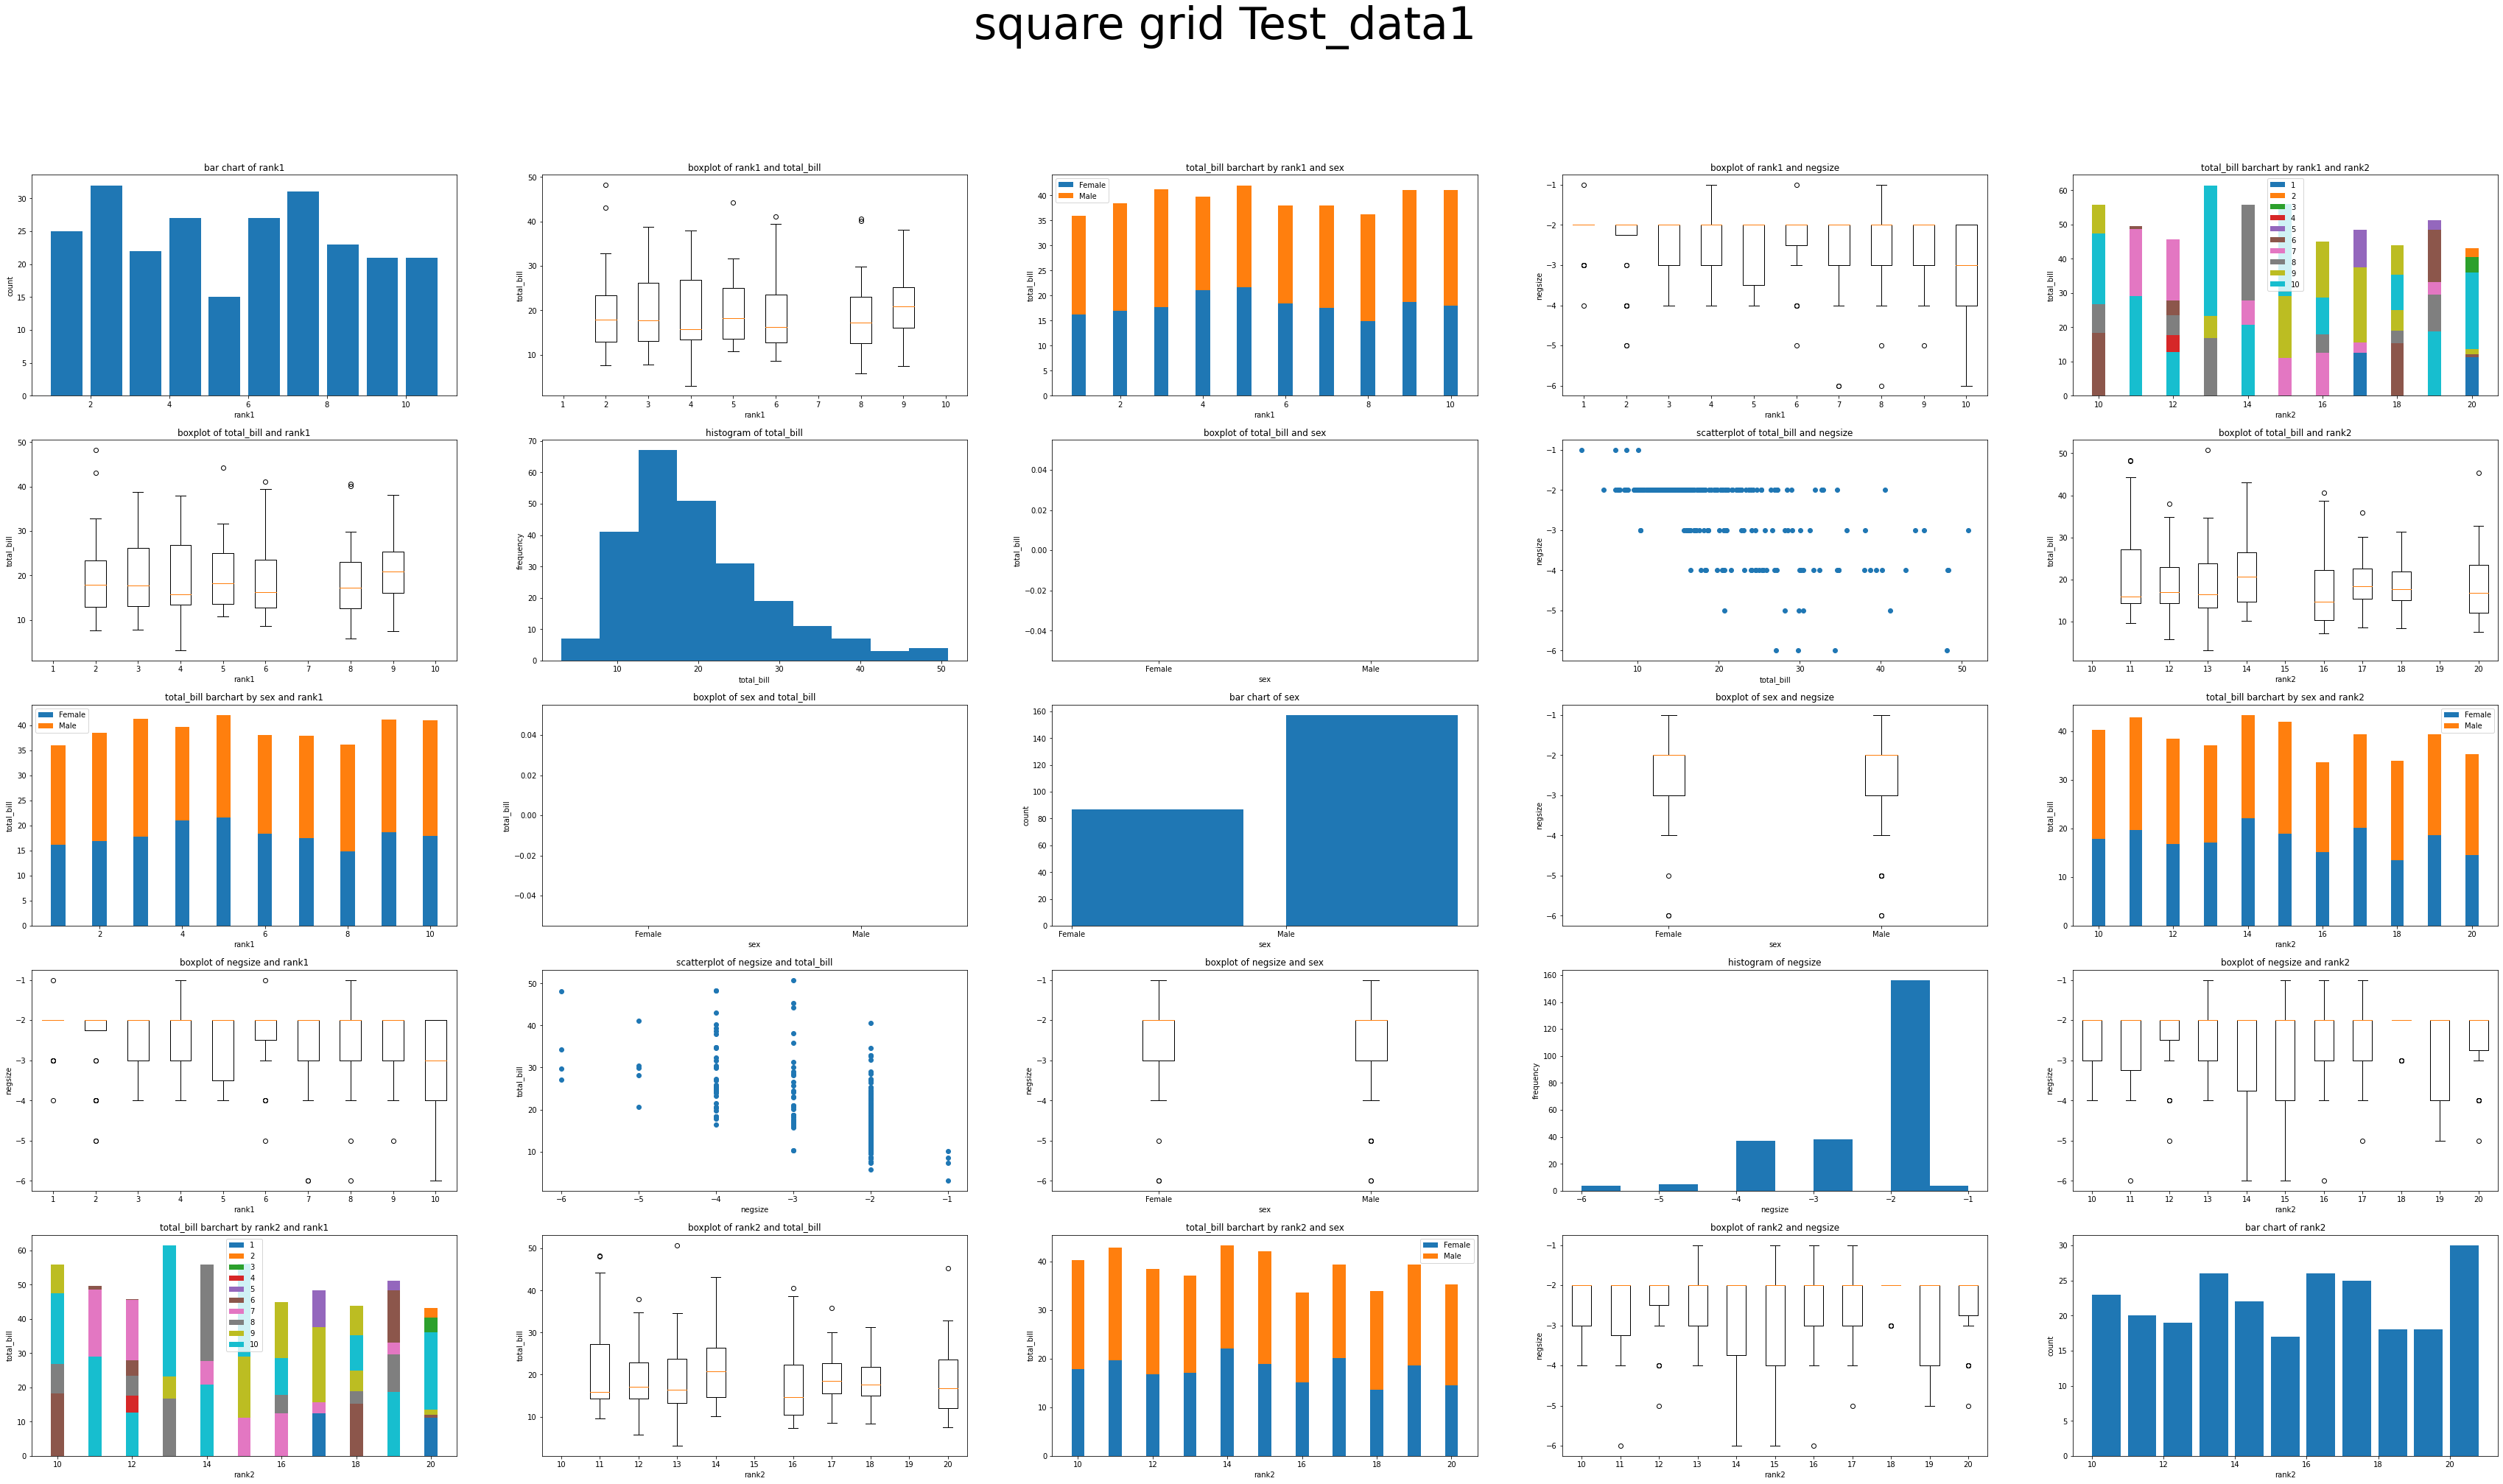

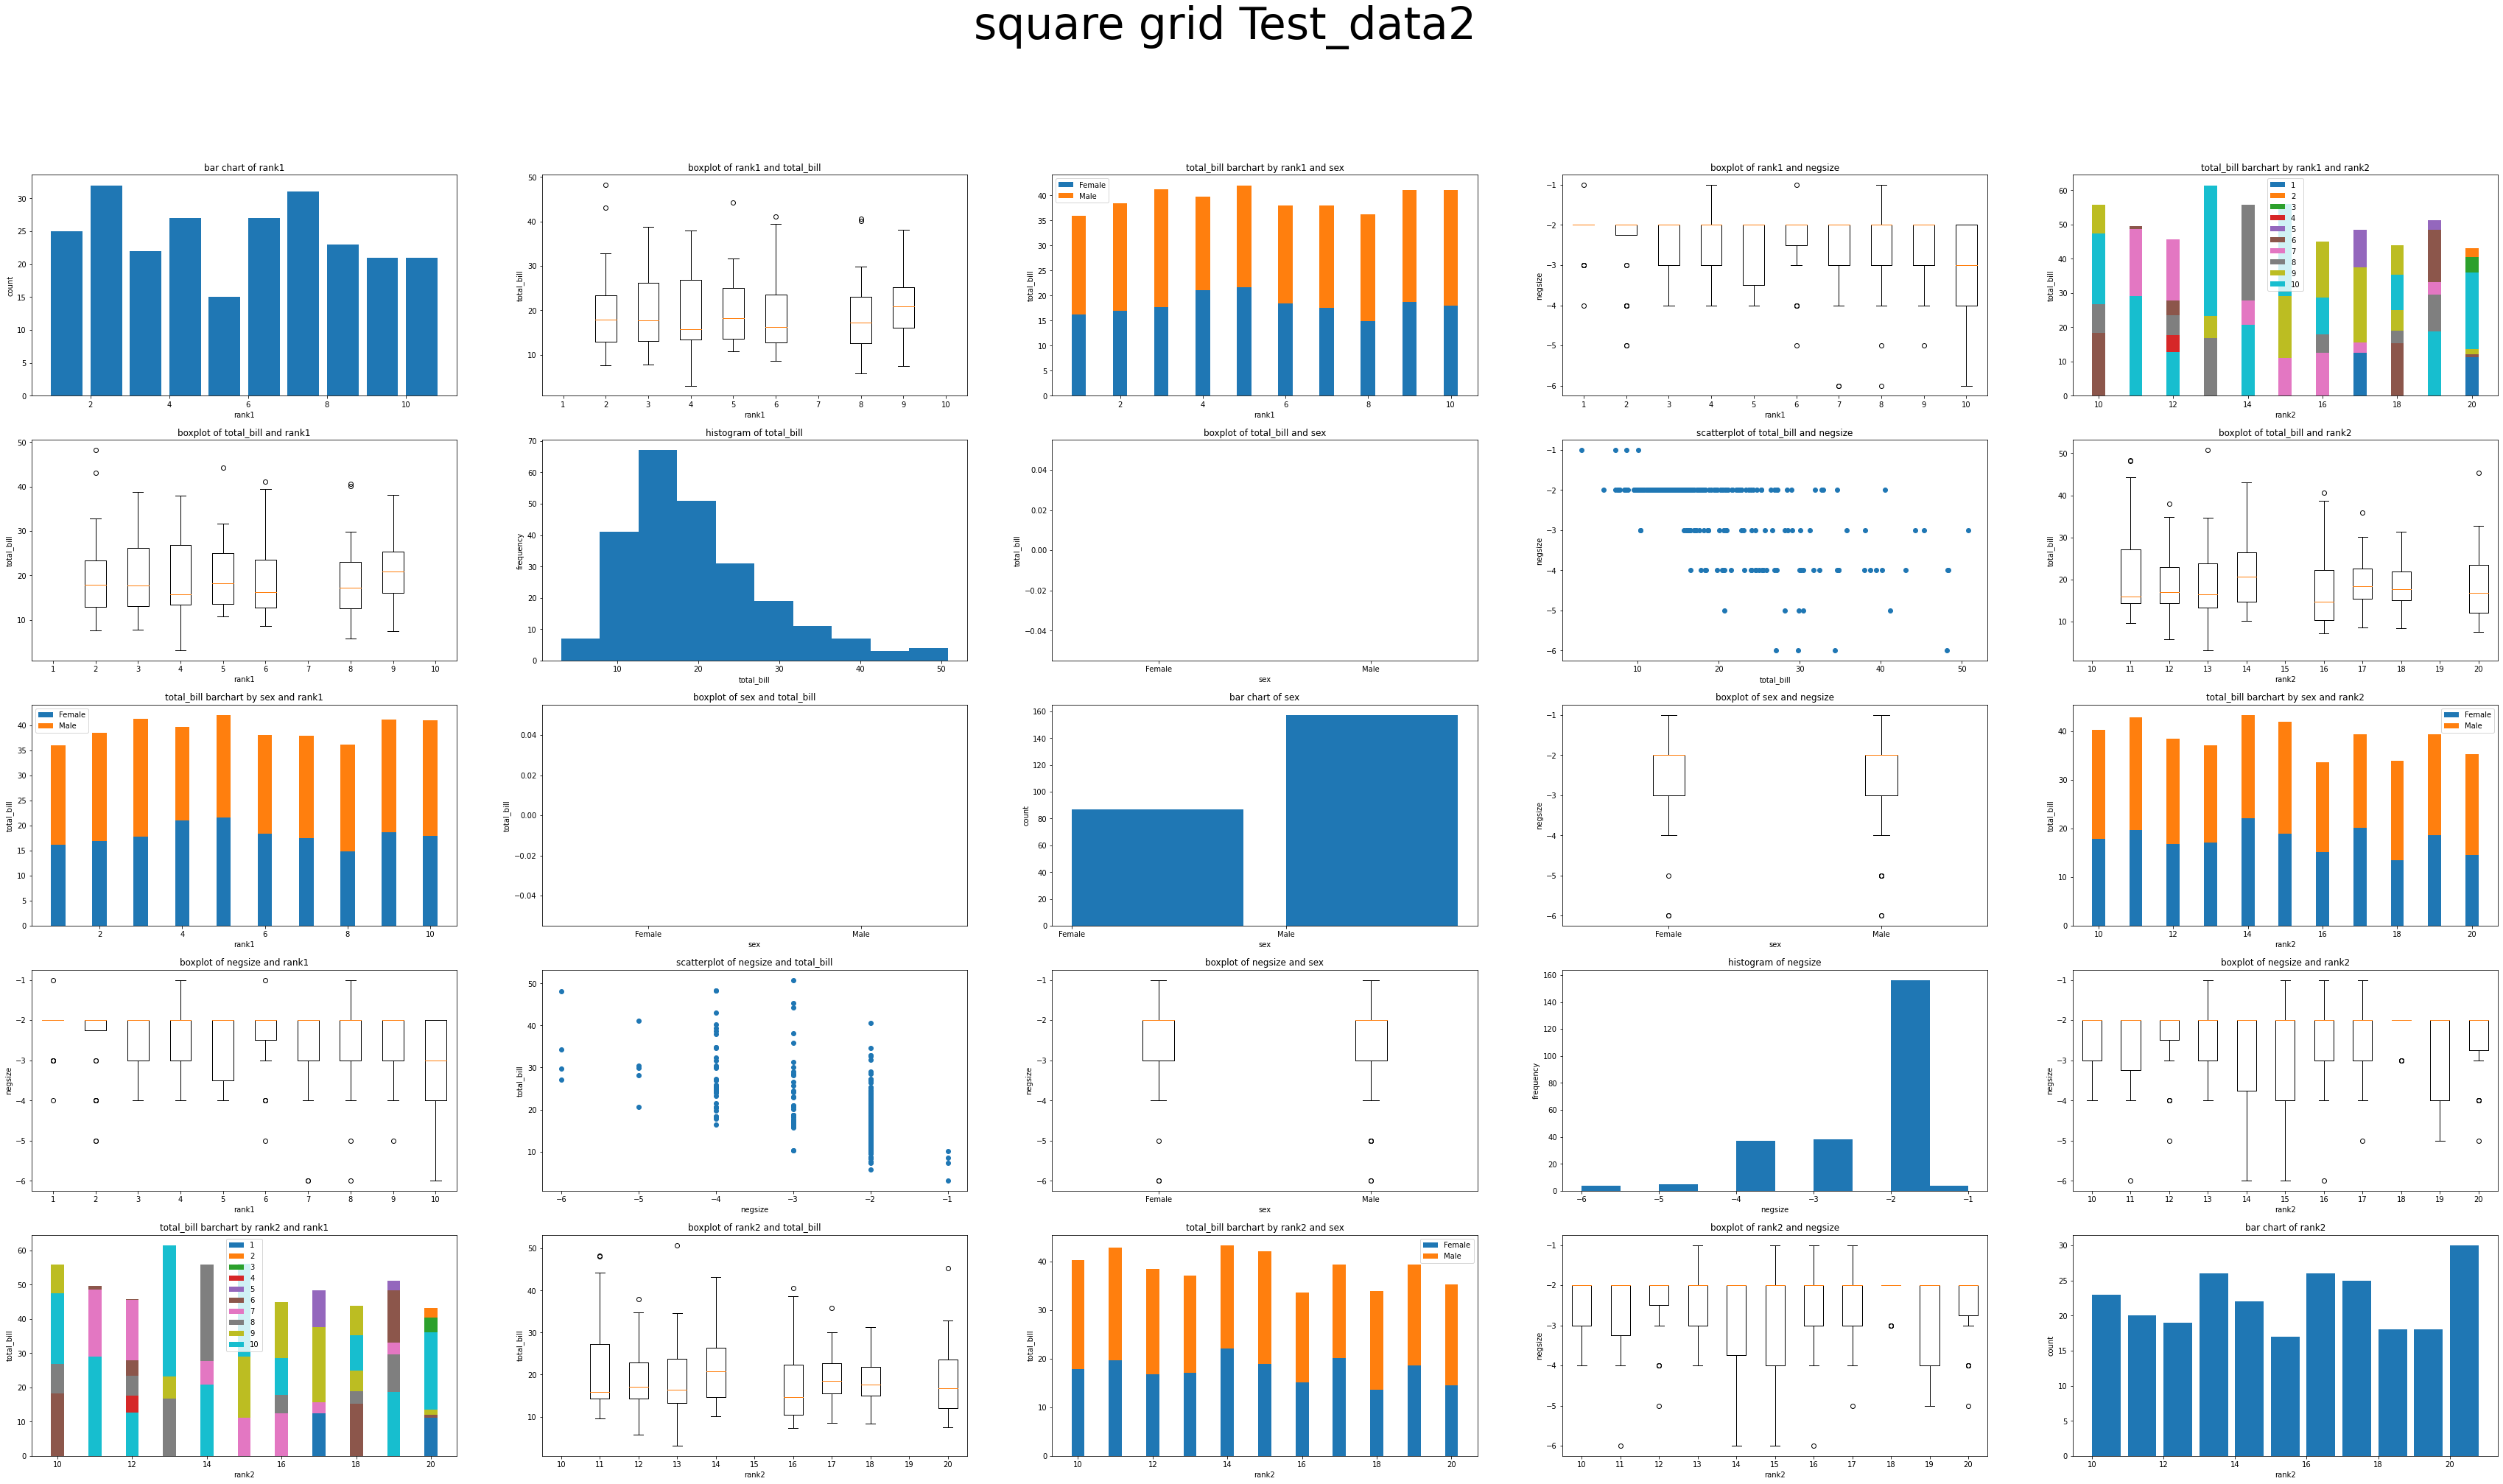

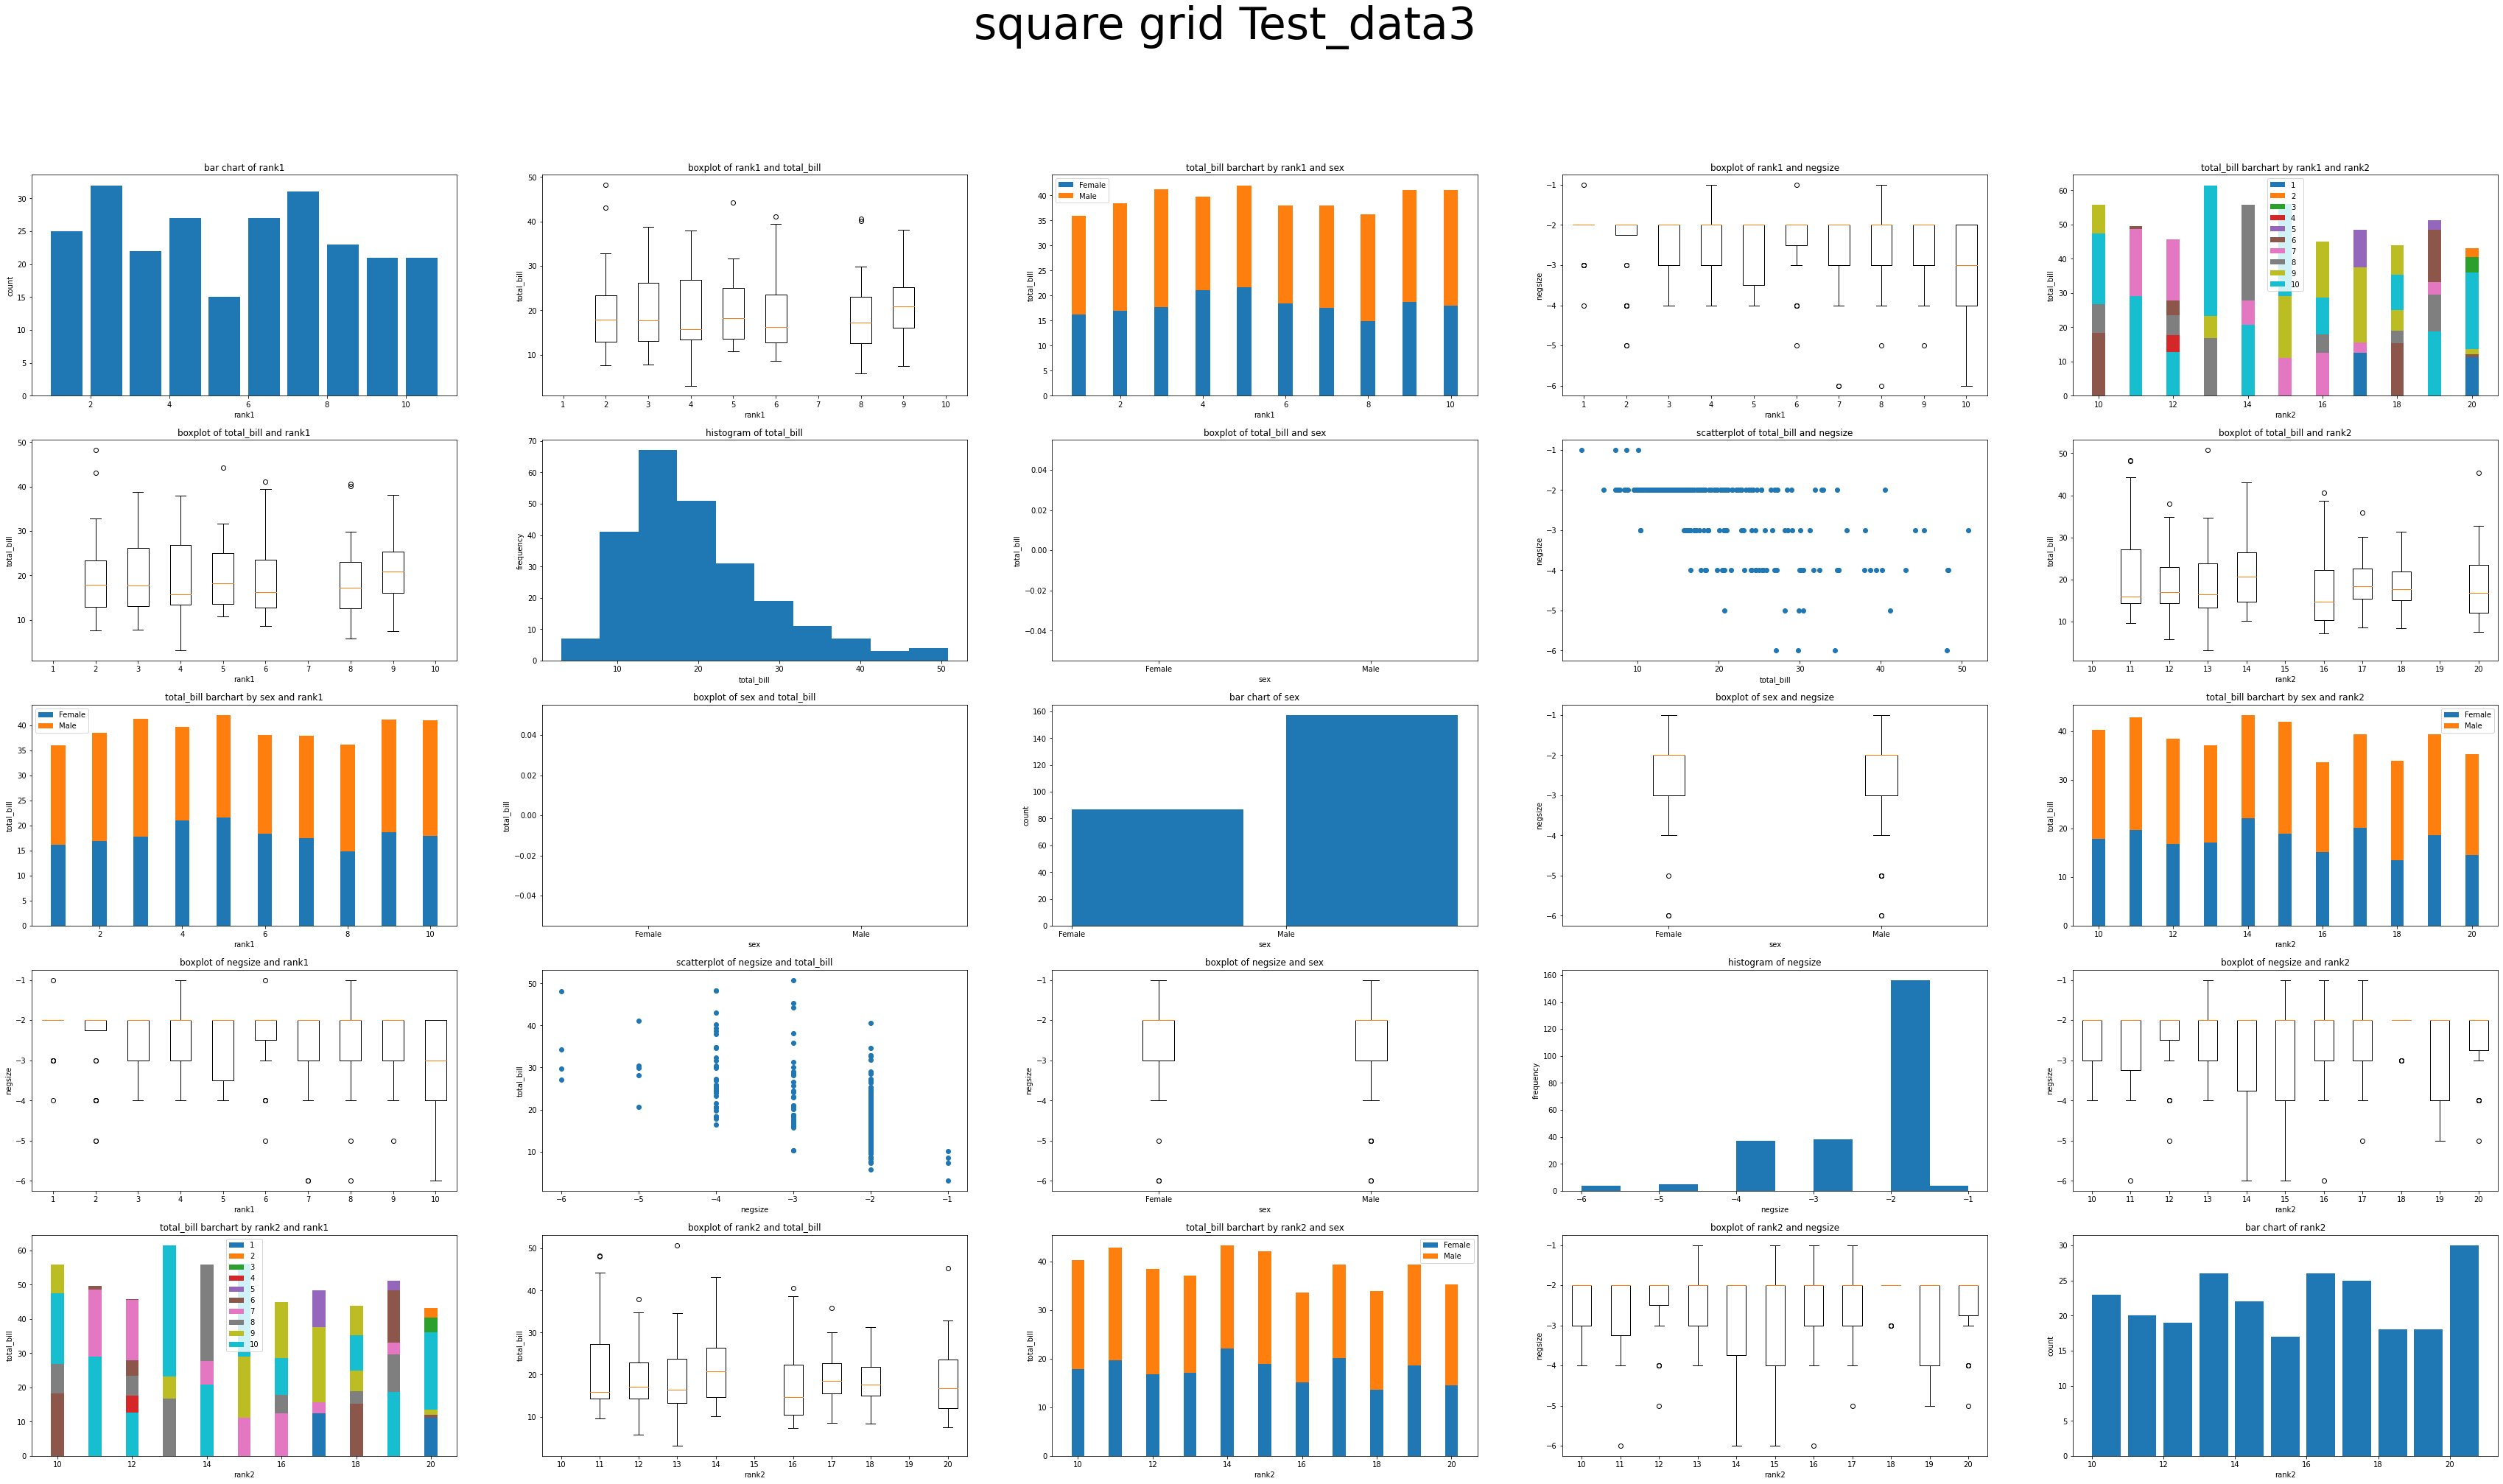

In [25]:
#run results
print("Test_data1 results")
print(simpleDDA(dfWithMeta1,"Test_data1"))

print("Test_data2 results")
print(simpleDDA(dfWithMeta2,"Test_data2"))

print("Test_data3 results")
print(simpleDDA(dfWithMeta3,"Test_data3"))